In [15]:
import keras
from keras import layers
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from two_layer_nn import TwoLayerNN
from utils import *

In [16]:
print("TensorFlow version:", tf.__version__)
print("GPUs available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPUs available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [17]:
print("Keras version:", keras.__version__)
print("Keras backend:", keras.backend.backend())
print("Layers imported successfully")

Keras version: 3.9.2
Keras backend: tensorflow
Layers imported successfully


# Task 4.1 - 4.3

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


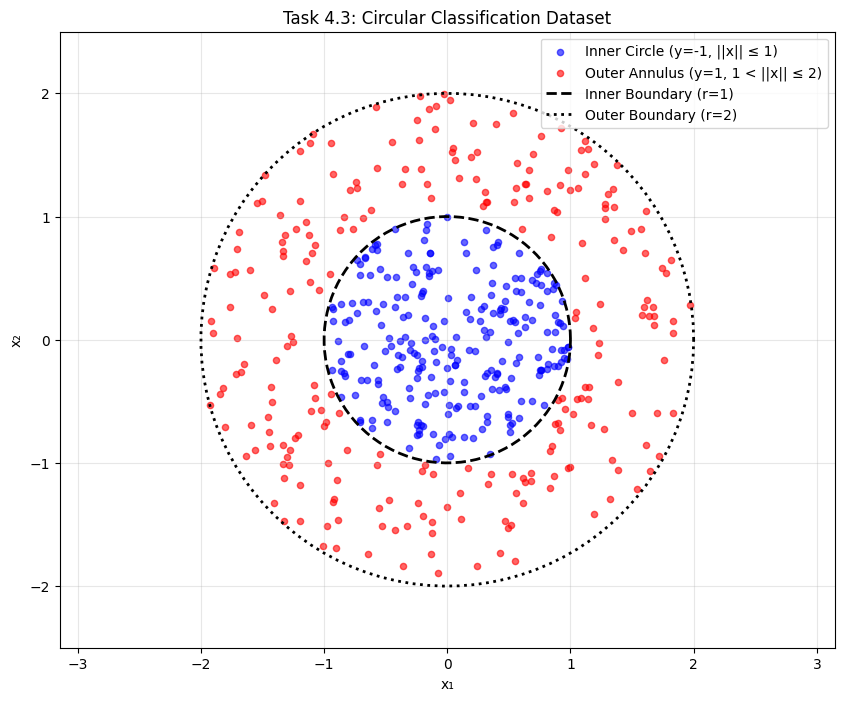


Initial loss: 1.5690594575428116
Initial accuracy: 0.418

Step      0/50000: Loss = 1.562130
Step    100/50000: Loss = 1.202019
Step    200/50000: Loss = 1.042069
Step    300/50000: Loss = 0.949381
Step    400/50000: Loss = 0.882541
Step    500/50000: Loss = 0.827140
Step    600/50000: Loss = 0.780076
Step    700/50000: Loss = 0.741392
Step    800/50000: Loss = 0.707762
Step    900/50000: Loss = 0.677707
Step   1000/50000: Loss = 0.650463
Step   1100/50000: Loss = 0.625925
Step   1200/50000: Loss = 0.603769
Step   1300/50000: Loss = 0.583063
Step   1400/50000: Loss = 0.564006
Step   1500/50000: Loss = 0.547082
Step   1600/50000: Loss = 0.531578
Step   1700/50000: Loss = 0.517077
Step   1800/50000: Loss = 0.503442
Step   1900/50000: Loss = 0.490795
Step   2000/50000: Loss = 0.478206
Step   2100/50000: Loss = 0.465959
Step   2200/50000: Loss = 0.455281
Step   2300/50000: Loss = 0.445709
Step   2400/50000: Loss = 0.435450
Step   2500/50000: Loss = 0.426076
Step   2600/50000: Loss = 0.417

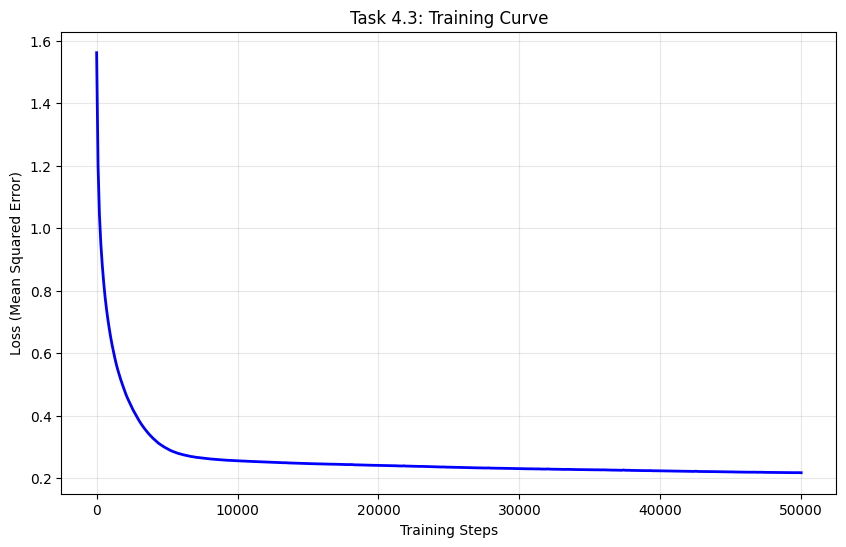

/home/nick-pc/Projects/Machine_Learning_Internship/mllab-exercise-4-braham_nordwald/utils.py:143: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2,


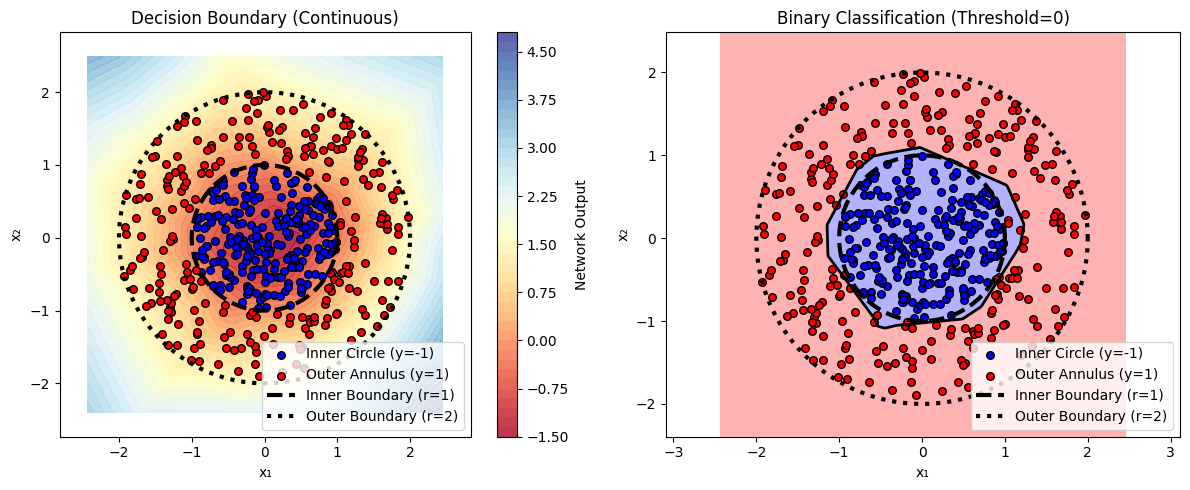


Test loss: 0.2511342434368758
Test accuracy: 0.95



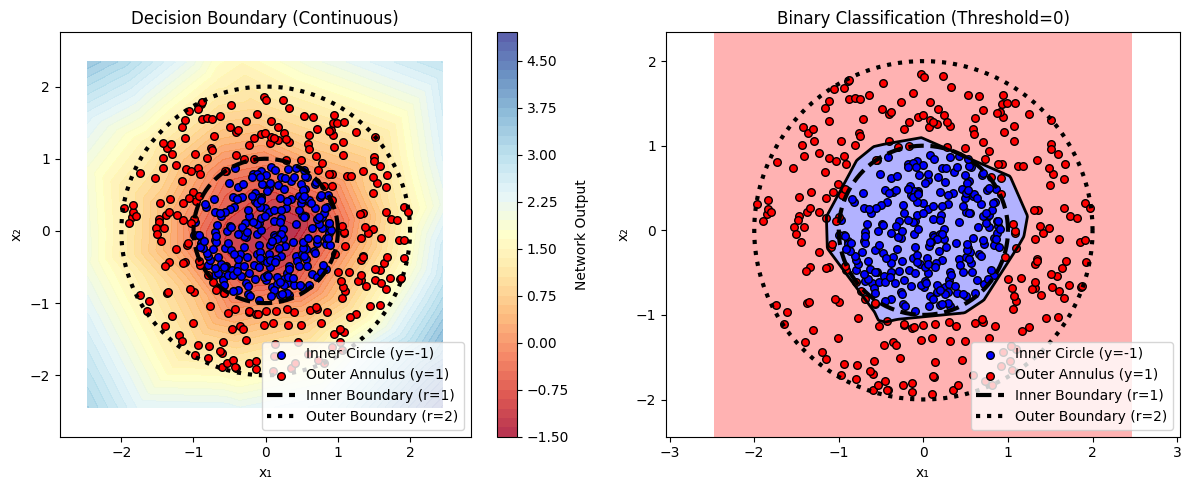

In [18]:
input_dim = 2
hidden_dim = 20
n_samples = 500 
learning_rate = 0.001
batch_size = 20 
num_steps = 50_000

X_train, y_train = generate_circular_dataset(n_samples)

plot_dataset(X_train, y_train, "Task 4.3: Circular Classification Dataset")

nn = TwoLayerNN(input_dim, hidden_dim)

y_pred_initial = nn.feedForward(X_train)
initial_loss = nn.compute_loss(y_pred_initial, y_train)
initial_accuracy = compute_accuracy(y_pred_initial, y_train)

print()
print(f"Initial loss: {initial_loss}")
print(f"Initial accuracy: {initial_accuracy}")
print()

loss_history = nn.train_sgd(
    X_train, y_train,
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_steps=num_steps,
    verbose=True
)

y_pred_final = nn.feedForward(X_train)
final_loss = nn.compute_loss(y_pred_final, y_train)
final_accuracy = compute_accuracy(y_pred_final, y_train)

print(y_pred_final)

print()
print(f"Final loss: {final_loss}")
print(f"Final accuracy: {final_accuracy}")
print()

# training curve
plt.figure(figsize=(10, 6))
steps = np.arange(0, num_steps + 1, 100)[:len(loss_history)]
plt.plot(steps, loss_history, 'b-', linewidth=2)
plt.xlabel('Training Steps')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Task 4.3: Training Curve')
plt.grid(True, alpha=0.3)
plt.show()

plot_decision_boundary(nn, X_train, y_train, "Task 4.3: Learned Decision Boundary")

X_test, y_test = generate_circular_dataset(500, 10)
y_pred_test = nn.feedForward(X_test)
test_loss = nn.compute_loss(y_pred_test, y_test)
test_accuracy = compute_accuracy(y_pred_test, y_test)

print()
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")
print()

plot_decision_boundary(nn, X_test, y_test, "Boundary on test data")

In [ ]:
X, y = generate_circular_dataset(n_samples=1000, random_state=42)

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='tanh')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

print("Model Architecture:")
model.summary()

print("\nTraining...")
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred_test = model.predict(X_test, verbose=0)

def compute_accuracy(y_pred, y_true, threshold=0):
    y_pred_binary = np.where(y_pred > threshold, 1, -1)
    accuracy = np.mean(y_pred_binary.flatten() == y_true.flatten())
    return accuracy

test_accuracy = compute_accuracy(y_pred_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Model Architecture:


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)


Training...
Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9662 - mae: 0.9430 - val_loss: 0.8977 - val_mae: 0.9160
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9040 - mae: 0.9269 - val_loss: 0.8524 - val_mae: 0.9005
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8381 - mae: 0.8956 - val_loss: 0.8131 - val_mae: 0.8828
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7933 - mae: 0.8725 - val_loss: 0.7736 - val_mae: 0.8620
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7624 - mae: 0.8567 - val_loss: 0.7358 - val_mae: 0.8419
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7085 - mae: 0.8239 - val_loss: 0.6987 - val_mae: 0.8200
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6882 - mae: 0.8128 - val_loss: 0.6640 - val_mae: 0.7981
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6361 - mae: 0.7774 - val_loss: 0.6279 - val_mae: 0.7745
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

We read in the MNIST data set and format it such that it is compatible with the Keras interface.

In [19]:
from keras import backend as K

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
img_rows, img_cols = 28, 28

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

The function `plot_history` below can be used to plot the outcome of Keras' `model.fit` routine.

In [20]:
def plot_history(history):
    x = range(history.params['epochs'])
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].set_title('accuracy')
    axarr[0].plot(x, acc, label='train')
    axarr[0].plot(x, val_acc, label='validation')
    axarr[0].legend()
    
    loss, val_loss = history.history['loss'], history.history['val_loss']
    axarr[1].set_title('loss')
    axarr[1].plot(x, loss, label='train')
    axarr[1].plot(x, val_loss, label='validation')
    axarr[1].legend()

Epoch 1/20


/home/nick-pc/Projects/Machine_Learning_Internship/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-05-24 16:25:07.188767: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 8 bytes spill stores, 8 bytes spill loads

2025-05-24 16:25:07.512805: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_72', 4 bytes spill stores, 4 bytes spill loads

2025-05-24 16:25:07.970591: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

421/469 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.4834 - loss: 1.7954

2025-05-24 16:25:10.844565: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 164 bytes spill stores, 168 bytes spill loads

2025-05-24 16:25:11.075714: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 104 bytes spill stores, 116 bytes spill loads

2025-05-24 16:25:11.136359: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 152 bytes spill stores, 152 bytes spill loads

2025-05-24 16:25:11.203625: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_213', 124 bytes spill stores, 124 bytes spill loads

2025-05-24 16:25:11.328521: I external/

469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5034 - loss: 1.7426 - val_accuracy: 0.8502 - val_loss: 0.6101
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8586 - loss: 0.5558 - val_accuracy: 0.8886 - val_loss: 0.4092
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.8899 - loss: 0.4012 - val_accuracy: 0.9027 - val_loss: 0.3499
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8996 - loss: 0.3535 - val_accuracy: 0.9094 - val_loss: 0.3154
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.9072 - loss: 0.3215 - val_accuracy: 0.9162 - val_loss: 0.2949
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9121 - loss: 0.3038 - val_accuracy: 0.9212 - val_loss: 0.2780
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.9189 - loss: 0.2818 - val_accuracy: 0.9251 - val_loss: 0.2664
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9231 - loss: 0.2677 - val_accuracy

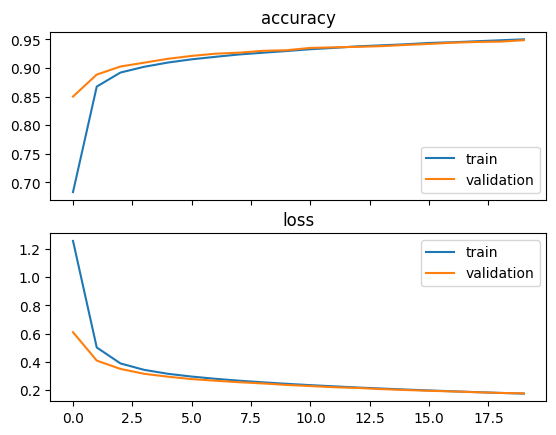

In [21]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history = model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, Y_test),
    verbose=1
)

plot_history(history)

Epoch 1/250


2025-05-24 16:25:23.950770: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_949', 436 bytes spill stores, 436 bytes spill loads



410/469 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.2776 - loss: 2.0605

2025-05-24 16:25:26.233958: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_949', 268 bytes spill stores, 268 bytes spill loads

2025-05-24 16:25:26.376346: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_965', 24 bytes spill stores, 24 bytes spill loads

2025-05-24 16:25:26.433846: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_949', 956 bytes spill stores, 956 bytes spill loads

2025-05-24 16:25:26.507495: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_949', 128 bytes spill stores, 128 bytes spill loads

2025-05-24 16:25:26.686451: I external

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3011 - loss: 2.0126 - val_accuracy: 0.8196 - val_loss: 0.7841
Epoch 2/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7242 - loss: 0.9099 - val_accuracy: 0.8761 - val_loss: 0.4780
Epoch 3/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8003 - loss: 0.6519 - val_accuracy: 0.8973 - val_loss: 0.3876
Epoch 4/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8354 - loss: 0.5520 - val_accuracy: 0.9052 - val_loss: 0.3425
Epoch 5/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8529 - loss: 0.4877 - val_accuracy: 0.9126 - val_loss: 0.3115
Epoch 6/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8666 - loss: 0.4428 - val_accuracy: 0.9164 - val_loss: 0.2893
Epoch 7/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8757 - loss: 0.4224 - val_accuracy: 0.9216 - val_loss: 0.2714
Epoch 8/250
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8832 - loss: 0.3947 - val_accu

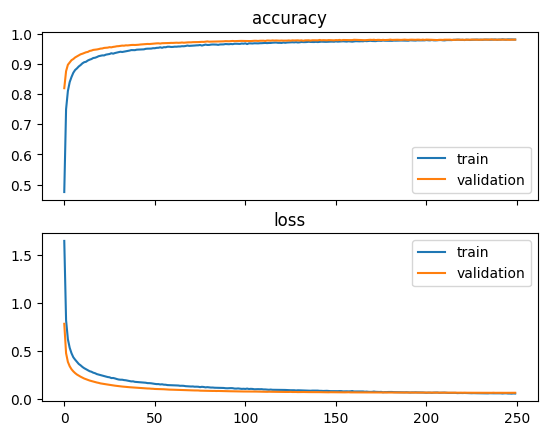

In [22]:
model_dropout = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

history_dropout = model_dropout.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=250,
    validation_data=(X_test, Y_test),
    verbose=1
)

plot_history(history_dropout)

Epoch 1/20
423/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7508 - loss: 0.8036

2025-05-24 16:27:22.459388: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1063', 24 bytes spill stores, 24 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7616 - loss: 0.7698 - val_accuracy: 0.9482 - val_loss: 0.1727
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9305 - loss: 0.2270 - val_accuracy: 0.9626 - val_loss: 0.1195
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9493 - loss: 0.1689 - val_accuracy: 0.9671 - val_loss: 0.1044
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9588 - loss: 0.1364 - val_accuracy: 0.9722 - val_loss: 0.0929
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9626 - loss: 0.1238 - val_accuracy: 0.9728 - val_loss: 0.0892
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9661 - loss: 0.1102 - val_accuracy: 0.9766 - val_loss: 0.0802
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9691 - loss: 0.0978 - val_accuracy: 0.9757 - val_loss: 0.0803
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9720 - loss: 0.0929 - val_accuracy: 0.9768 - va

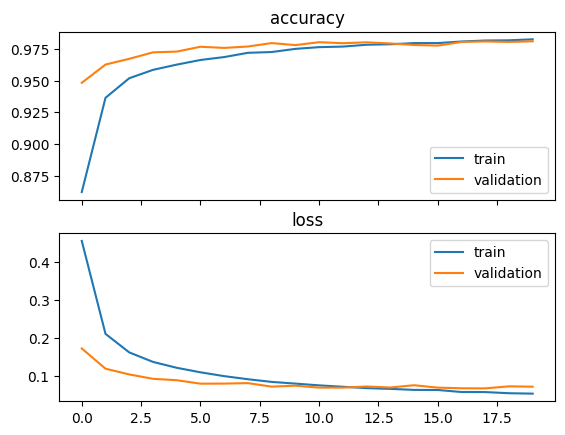

In [23]:
model_adam = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_adam = model_adam.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_test, Y_test),
    verbose=1
)

plot_history(history_adam)

/home/nick-pc/Projects/Machine_Learning_Internship/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,042 (2.27 MB)

 Trainable params: 596,042 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8258 - loss: 0.5524 - val_accuracy: 0.9799 - val_loss: 0.0615
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1108 - val_accuracy: 0.9869 - val_loss: 0.0429
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0765 - val_accuracy: 0.9875 - val_loss: 0.0372
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0637 - val_accuracy: 0.9899 - val_loss: 0.0321
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0465 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.9910 - val_loss: 0.0289
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0385 - val_accurac

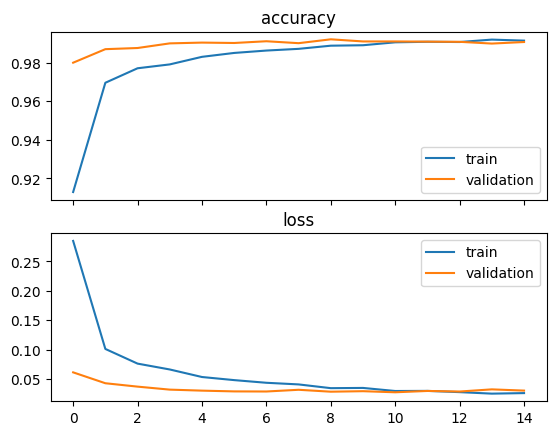

In [ ]:
cnn_model = keras.models.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=15,
    validation_data=(X_test, Y_test),
    verbose=1
)

plot_history(cnn_history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


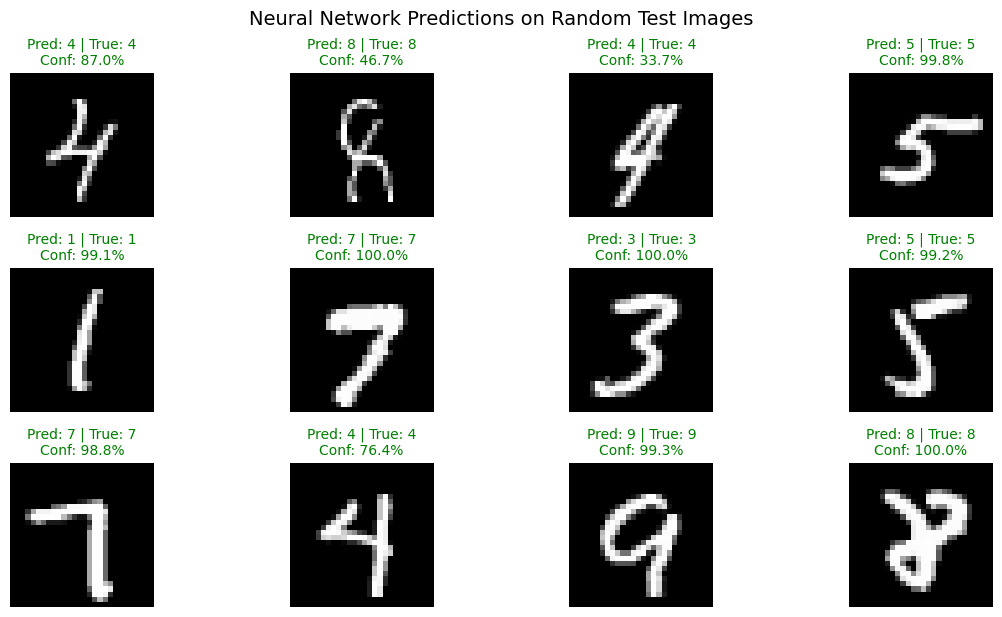

Correct predictions: 12/12 (100.0%)


In [25]:
n_images = 12
random_indices = np.random.choice(len(X_test), n_images, replace=False)

predictions = model.predict(X_test[random_indices])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test[random_indices], axis=1)

fig, axes = plt.subplots(3, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(n_images):

    axes[i].imshow(X_test[random_indices[i]].reshape(28, 28), cmap='gray')
    
    confidence = np.max(predictions[i]) * 100
    
    predicted = predicted_classes[i]
    true = true_classes[i]
    
    color = 'green' if predicted == true else 'red'
    
    axes[i].set_title(f'Pred: {predicted} | True: {true}\nConf: {confidence:.1f}%', 
                      color=color, fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle('Neural Network Predictions on Random Test Images', y=1.02, fontsize=14)
plt.show()

correct = np.sum(predicted_classes == true_classes)
print(f"Correct predictions: {correct}/{n_images} ({correct/n_images*100:.1f}%)")